In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df= pd.read_csv('../data/gdp_percapita.csv')

How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB
None


There are 4 columns and 7662 rows.  Column 1 is an object, column 2 is an integer, and columns 3 and 4 are floats.

Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df= gdp_df.drop('Value Footnotes',axis=1) #drops column

In [5]:
gdp_df= gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'}) #renaming columns

In [6]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [7]:
min_year = gdp_df['Year'].min()
max_year = gdp_df['Year'].max()
print(min_year,max_year)

n = gdp_df.nunique(axis=0)
print("No.of.unique values in each column :\n", n) #tells me how many countries are in the df and how many years

1990 2022
No.of.unique values in each column :
 Country            242
Year                33
GDP_Per_Capita    7624
dtype: int64


In [8]:
total_each_year= gdp_df.groupby('Year').count()
print(total_each_year['Country'])

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: Country, dtype: int64


In [9]:
missing_years = gdp_df.groupby("Country")["Year"].count()<33 
#this should be a list of countries with less than 33 years of data but need to figure out how to return a count value

print(missing_years[missing_years==True]) 


Country
Afghanistan                  True
Aruba                        True
Bhutan                       True
Bosnia and Herzegovina       True
Cambodia                     True
Cayman Islands               True
Croatia                      True
CuraÃ§ao                     True
Djibouti                     True
Estonia                      True
Hungary                      True
Iceland                      True
Israel                       True
Kosovo                       True
Kuwait                       True
Latvia                       True
Lebanon                      True
Liberia                      True
Libya                        True
Lithuania                    True
Maldives                     True
Moldova                      True
Montenegro                   True
Nauru                        True
Other small states           True
Palau                        True
Qatar                        True
San Marino                   True
Serbia                       True
Sint M

In [10]:
all_years=missing_years[missing_years==False].count()

print(all_years) #countries with data for all 33 years

202


In [11]:
some_years=missing_years[missing_years==True].count()
print(some_years) #countries missing at least one year of data

40


In [12]:
many_years=gdp_df.groupby("Country")["Year"].count()<=28 #defining 'many years' as at least 5 years 
print(many_years[many_years==True].count())
print(many_years[many_years==True])

29
Country
Afghanistan                  True
Cayman Islands               True
Croatia                      True
CuraÃ§ao                     True
Djibouti                     True
Estonia                      True
Iceland                      True
Israel                       True
Kosovo                       True
Latvia                       True
Liberia                      True
Libya                        True
Lithuania                    True
Maldives                     True
Moldova                      True
Montenegro                   True
Nauru                        True
Other small states           True
Palau                        True
Qatar                        True
San Marino                   True
Serbia                       True
Sint Maarten (Dutch part)    True
Slovenia                     True
Small states                 True
Somalia                      True
SÃ£o TomÃ© and Principe      True
Timor-Leste                  True
Turks and Caicos Islands     True
Nam

There are 202 countries with data for all 33 years and 29 countries missing at least 5 years of data. A lot of these countries have had some type of war or conflict in the past 33 years which could be why there is data missing.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

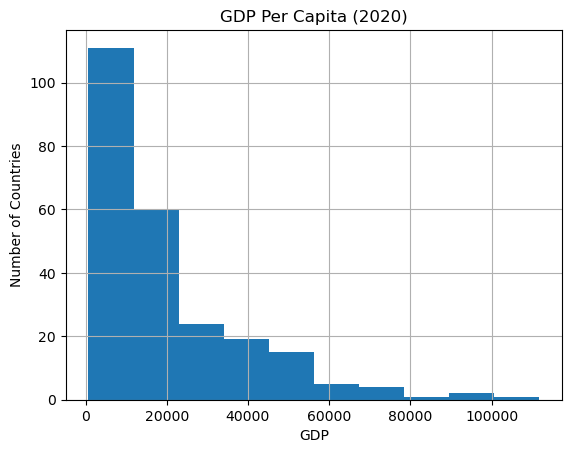

In [13]:
#histogram
gdp_2020=gdp_df[gdp_df['Year']==2020]
gdp_2020.hist('GDP_Per_Capita')
plt.title('GDP Per Capita (2020)')
plt.ylabel('Number of Countries')
plt.xlabel('GDP')
plt.show();

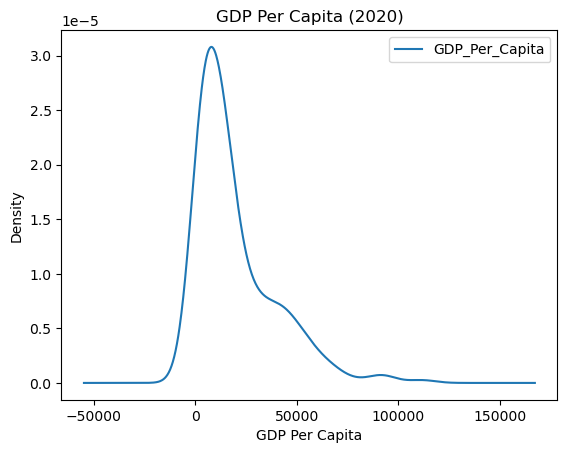

In [14]:
#density plot
gdp_2020.plot(kind='density',x='Country',y='GDP_Per_Capita')
plt.title('GDP Per Capita (2020)')
plt.xlabel('GDP Per Capita');

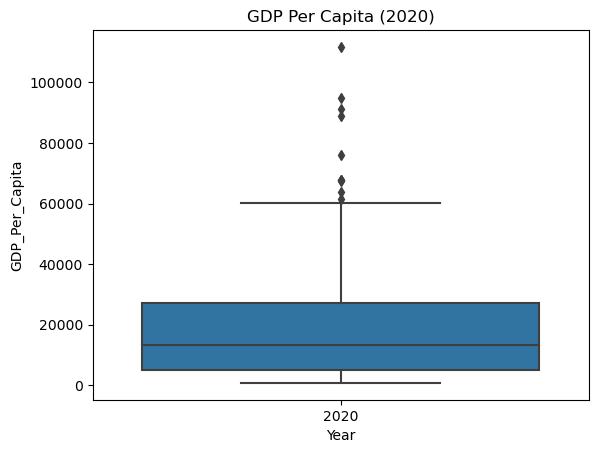

In [15]:
#boxplot
sns.boxplot(x='Year',y='GDP_Per_Capita',data=gdp_2020)
plt.title('GDP Per Capita (2020)');


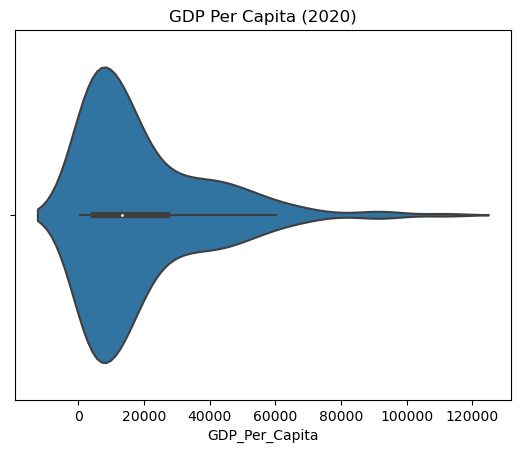

In [16]:
#violin plot
sns.violinplot(x='GDP_Per_Capita',data=gdp_2020)
plt.title('GDP Per Capita (2020)');


9. What was the median GDP per capita value in 2020?

In [17]:
median_gdp_2020=gdp_2020['GDP_Per_Capita'].median()
print('Median GDP Per Capita (2020) $',round(median_gdp_2020,2))

Median GDP Per Capita (2020) $ 13358.0


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [18]:
gdp_decades=gdp_decades = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]

print(gdp_decades)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
11                    Afghanistan  2010     2026.163818
22    Africa Eastern and Southern  2020     3455.023119
32    Africa Eastern and Southern  2010     3513.315920
42    Africa Eastern and Southern  2000     2897.140841
...                           ...   ...             ...
7628                       Zambia  1990     2290.039226
7631                     Zimbabwe  2020     1990.319419
7641                     Zimbabwe  2010     1799.540233
7651                     Zimbabwe  2000     2750.601236
7661                     Zimbabwe  1990     2704.757299

[921 rows x 3 columns]


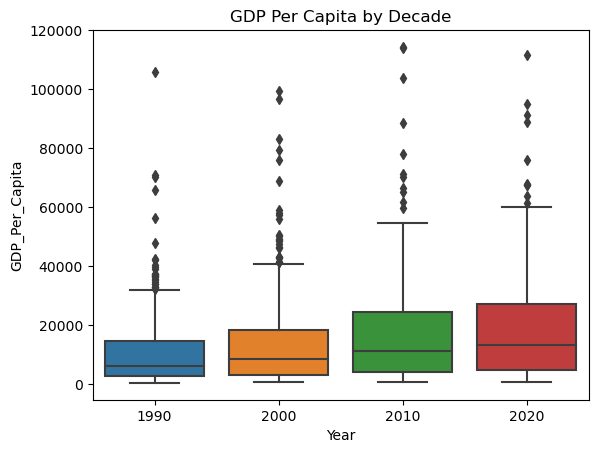

In [19]:
#boxplot
sns.boxplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)
plt.title('GDP Per Capita by Decade');

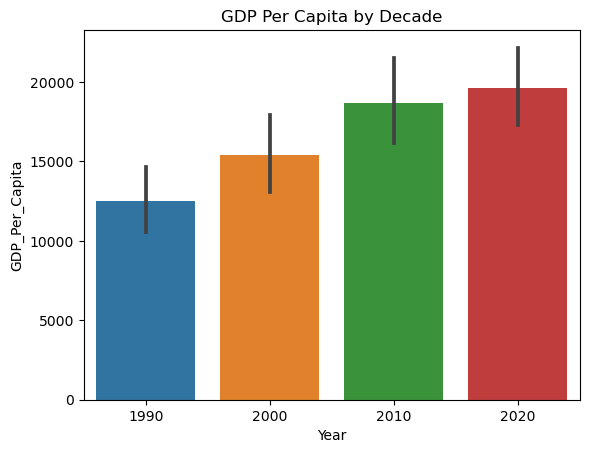

In [20]:
#barplot
sns.barplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)
plt.title('GDP Per Capita by Decade');

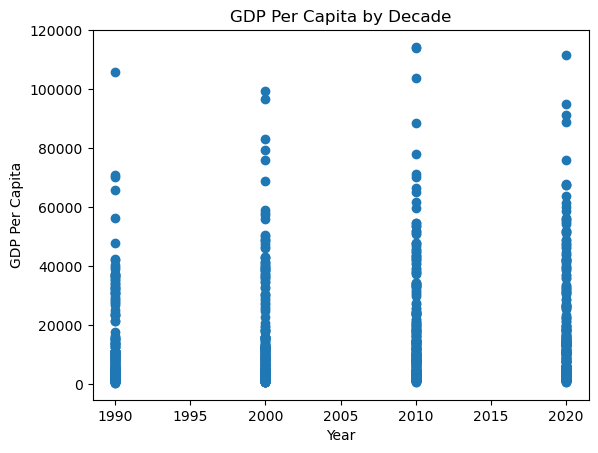

In [21]:
#scatterplot
plt.scatter(x='Year',y='GDP_Per_Capita',data=gdp_decades)
plt.title('GDP Per Capita by Decade')
plt.ylabel('GDP Per Capita')
plt.xlabel('Year');

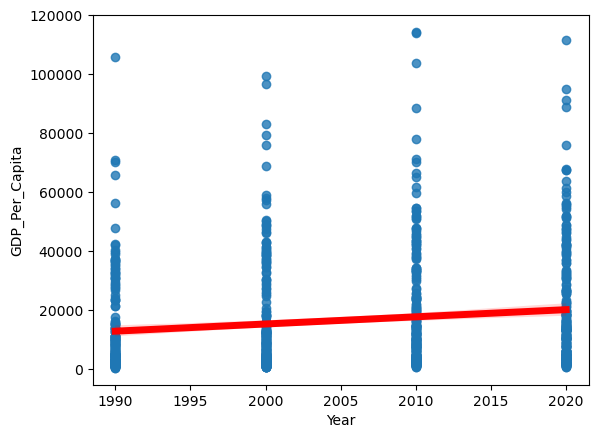

In [22]:
#scatterplot with a trend line
sns.regplot(x='Year',y='GDP_Per_Capita',data=gdp_decades,line_kws = {"color": "red","lw":5});

11. Which country was the first to have a GDP per capita greater than $100,000?

In [23]:
gdp_100k=gdp_df[gdp_df['GDP_Per_Capita']>100000]
print(round(gdp_100k.sort_values(['Year','Country'],ascending=[True,True]).head(1),2))


                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990       105893.63


The UAE was the first country to have a GDP per capita over $100,000

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset

In [24]:
highest_gdp_2020=gdp_2020.sort_values(['GDP_Per_Capita'],ascending=False).head(1)
print(highest_gdp_2020)

         Country  Year  GDP_Per_Capita
4148  Luxembourg  2020   111751.314751


         Country  Year  GDP_Per_Capita
4146  Luxembourg  2022   115541.774828
4147  Luxembourg  2021   115683.493708
4148  Luxembourg  2020   111751.314751
4149  Luxembourg  2019   114542.496934
4150  Luxembourg  2018   114164.468558
4151  Luxembourg  2017   114985.842236
4152  Luxembourg  2016   116283.699681
4153  Luxembourg  2015   113182.728563
4154  Luxembourg  2014   113313.578898
4155  Luxembourg  2013   113050.663254
4156  Luxembourg  2012   112137.135491
4157  Luxembourg  2011   112998.390477
4158  Luxembourg  2010   114343.988089
4159  Luxembourg  2009   112230.081410
4160  Luxembourg  2008   118154.667184
4161  Luxembourg  2007   120647.822959
4162  Luxembourg  2006   113346.035782
4163  Luxembourg  2005   108632.360016
4164  Luxembourg  2004   107634.837198
4165  Luxembourg  2003   104743.000088
4166  Luxembourg  2002   103317.331098
4167  Luxembourg  2001   101143.147977
4168  Luxembourg  2000    99301.526999
4169  Luxembourg  1999    94115.384035
4170  Luxembourg  1998   

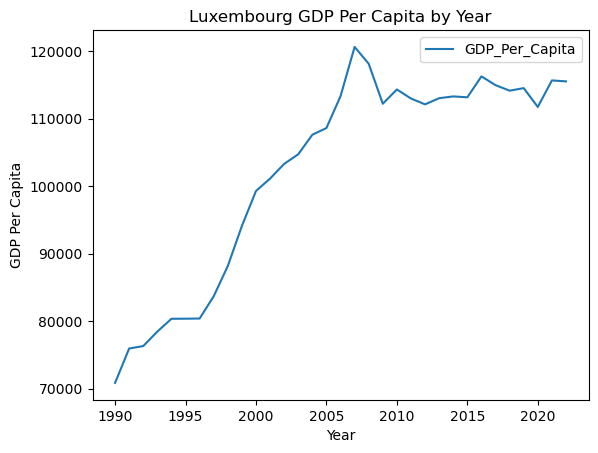

In [25]:
lux_gdp=gdp_df[gdp_df['Country']=='Luxembourg']
print(lux_gdp)
lux_gdp.plot(x='Year',y='GDP_Per_Capita')
plt.title('Luxembourg GDP Per Capita by Year')
plt.ylabel('GDP Per Capita')
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [26]:
lowest_gdp_2020=gdp_2020.sort_values(['GDP_Per_Capita'],ascending=True).head(1)
print(lowest_gdp_2020)

     Country  Year  GDP_Per_Capita
973  Burundi  2020      711.355263


      Country  Year  GDP_Per_Capita
971   Burundi  2022      708.178317
972   Burundi  2021      714.066712
973   Burundi  2020      711.355263
974   Burundi  2019      729.658463
975   Burundi  2018      740.448223
976   Burundi  2017      750.787616
977   Burundi  2016      764.336602
978   Burundi  2015      781.579287
979   Burundi  2014      831.294839
980   Burundi  2013      824.610523
981   Burundi  2012      814.320771
982   Burundi  2011      807.664958
983   Burundi  2010      804.354941
984   Burundi  2009      801.803427
985   Burundi  2008      812.592170
986   Burundi  2007      807.447481
987   Burundi  2006      809.696011
988   Burundi  2005      796.108713
989   Burundi  2004      818.746063
990   Burundi  2003      810.552335
991   Burundi  2002      846.747295
992   Burundi  2001      833.670879
993   Burundi  2000      837.348411
994   Burundi  1999      862.006680
995   Burundi  1998      891.699844
996   Burundi  1997      867.284265
997   Burundi  1996      880

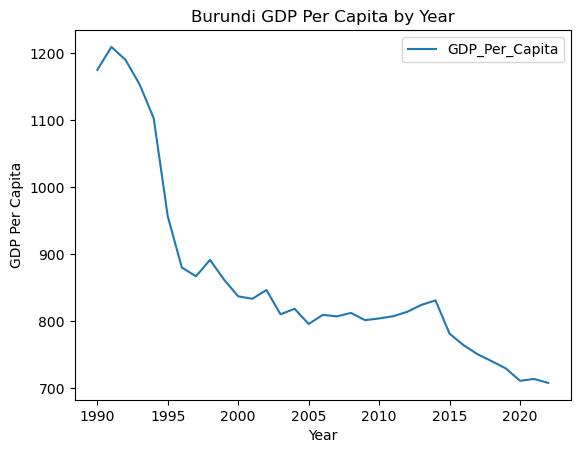

In [27]:
burundi_gdp=gdp_df[gdp_df['Country']=='Burundi']
print(burundi_gdp)
burundi_gdp.plot(x='Year',y='GDP_Per_Capita')
plt.title('Burundi GDP Per Capita by Year')
plt.ylabel('GDP Per Capita')
plt.show()

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [28]:
internet_df= pd.read_csv('../data/internet_use.csv',on_bad_lines='skip')
print(internet_df.head())
print(internet_df.tail())
print(internet_df.info())

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area                                               Year  \
4670             175             Includes individuals 3 years and older   
4671             176                                   NTIA/CPS survey.   
4672             178  Estimated based on Survey's results. Populatio...   
4673             179                     Preliminary. Country estimate.   
4674             180  The methodology used to estimated the figure f...   

      Value  Value Footnotes  
4670    NaN              NaN  
4671    NaN              NaN  
4672    NaN              NaN  
4673    NaN              NaN  
4674    NaN              NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 en

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [29]:
internet_df.dropna(inplace=True)
internet_df= internet_df.drop('Value Footnotes',axis=1)

In [30]:
internet_df= internet_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'Internet_Users_Pct'}) 
print(internet_df.head())
print(internet_df.info())

                 Country  Year  Internet_Users_Pct
101  Antigua and Barbuda  2011                52.0
122            Argentina  2011                51.0
144              Armenia  2013                41.9
184            Australia  2013                83.0
185            Australia  2012                79.0
<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 101 to 4454
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             948 non-null    object 
 1   Year                948 non-null    object 
 2   Internet_Users_Pct  948 non-null    float64
dtypes: float64(1), object(2)
memory usage: 29.6+ KB
None


16. Look at the number of observations in this dataset per year. What do you notice?

In [31]:
i = internet_df.nunique(axis=0)
print("No.of.unique values in each column :\n", i)
print(internet_df.tail())

No.of.unique values in each column :
 Country               121
Year                   43
Internet_Users_Pct    836
dtype: int64
        Country  Year  Internet_Users_Pct
4309    Uruguay  2007               34.00
4368  Venezuela  2011               40.22
4369  Venezuela  2010               37.37
4370  Venezuela  2009               32.70
4454     Zambia  2011               11.50


There are less countries in this df than in the GDP df

17. What is the first year to have a non-zero internet users percentage value?

In [32]:
internet_year_min=internet_df[internet_df['Internet_Users_Pct']>=1]
print(internet_year_min.sort_values(['Year','Country'],ascending=[True,True]).head(1))

      Country  Year  Internet_Users_Pct
1387  Finland  1991            1.397439


18. How does the distribution of internet users percent differ for 2000 and 2014?

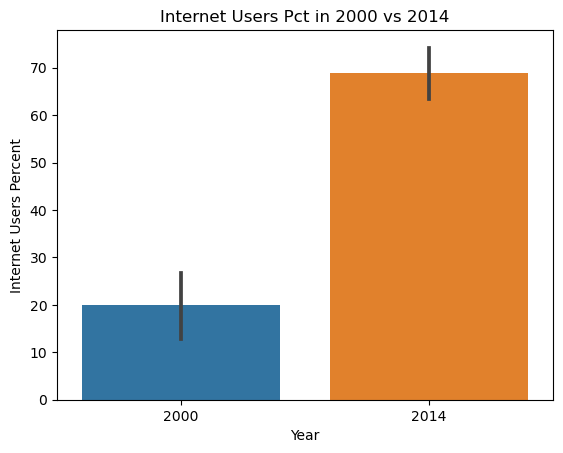

In [33]:
#internet_df['Year']=internet_df['Year'].astype(int)
internet_users_2000_and_2014=internet_df[internet_df['Year'].isin(['2000','2014'])]
internet_users_2000_and_2014=internet_users_2000_and_2014.sort_values('Year',ascending=True)
sns.barplot(x='Year',y='Internet_Users_Pct',data=internet_users_2000_and_2014)
plt.xlabel('Year')
plt.ylabel('Internet Users Percent')
plt.title('Internet Users Pct in 2000 vs 2014');

19. For how many countries was the percentage of internet users below 5% in 2014?

In [34]:
internet_pct_2014=internet_df[internet_df['Year']=='2014']
internet_less_5pct_2014=internet_pct_2014[internet_pct_2014['Internet_Users_Pct']<5]
print(internet_less_5pct_2014.count())

Country               0
Year                  0
Internet_Users_Pct    0
dtype: int64


There were 16 countries in 2014 that had less than 5% internet users

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [35]:
internet_df['Year']=internet_df['Year'].astype(int)
gdp_and_internet_use=pd.merge(gdp_df,internet_df, how='outer', on=['Country','Year'])
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())
print(gdp_and_internet_use.info())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2021     1517.016266                 NaN
1  Afghanistan  2020     1968.341002                 NaN
2  Afghanistan  2019     2079.921861                 NaN
3  Afghanistan  2018     2060.698973                 NaN
4  Afghanistan  2017     2096.093111                 NaN
        Country  Year  GDP_Per_Capita  Internet_Users_Pct
7828     Turkey  1993             NaN            0.008458
7829     Turkey  1990             NaN            0.000000
7830  Venezuela  2011             NaN           40.220000
7831  Venezuela  2010             NaN           37.370000
7832  Venezuela  2009             NaN           32.700000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             7833 non-null   object 
 1   Year                7833 non-null   int64  
 2   GDP

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2993  Iceland  2014    50450.741612               98.16
5212   Norway  2014    62838.515727               96.30
1669  Denmark  2014    52048.335493               95.99


C:\Users\emmal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


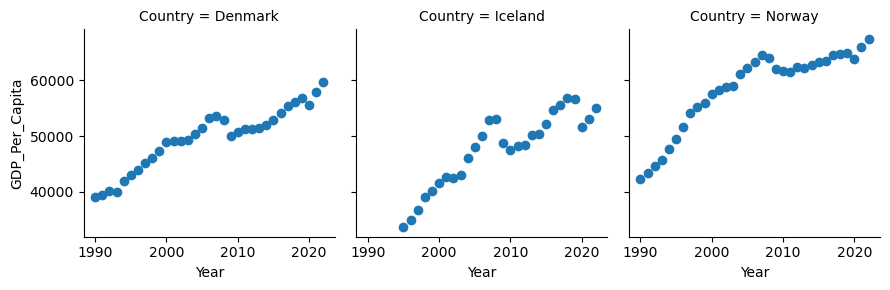

In [36]:
highest_internet_pct_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
top3_internet_pct_2014=highest_internet_pct_2014.sort_values(['Internet_Users_Pct'],ascending=False).head(3)
print(top3_internet_pct_2014)

top3_gdp_over_time=gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top3_internet_pct_2014['Country'])]
sns.FacetGrid(top3_gdp_over_time,col='Country').map(plt.scatter,'Year','GDP_Per_Capita')

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [37]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

Text(0.5, 1.0, 'Internet Use compared to GDP Per Capita (2014)')

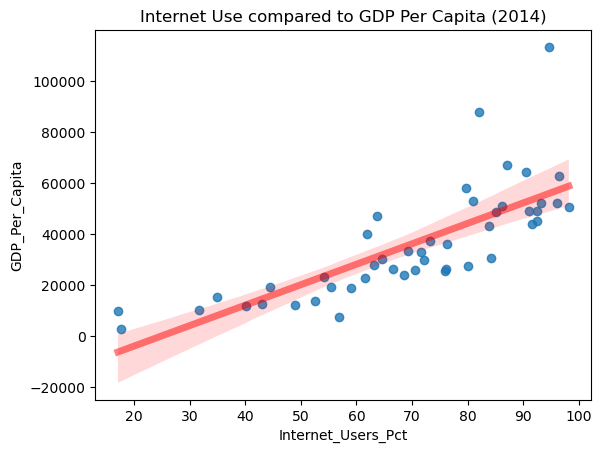

In [38]:
sns.regplot(x=gdp_and_internet_use_2014['Internet_Users_Pct'],y=gdp_and_internet_use_2014['GDP_Per_Capita'],line_kws={'color':'red','alpha':0.5,'lw':5})
plt.title('Internet Use compared to GDP Per Capita (2014)')

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [39]:
gdp_and_internet_use['GDP_Group']=pd.qcut(gdp_and_internet_use.loc[:, ('GDP_Per_Capita')],3,labels=['Low','Medium','High'])
print(gdp_and_internet_use_2014.head())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
7                    Afghanistan  2014     2144.449634                 NaN
28   Africa Eastern and Southern  2014     3642.875373                 NaN
61    Africa Western and Central  2014     4146.994622                 NaN
94                       Albania  2014    11586.817446                 NaN
127                      Algeria  2014    11561.259795                 NaN


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [40]:
print(gdp_and_internet_use.groupby('GDP_Group')['Internet_Users_Pct'].median())

GDP_Group
Low        6.63
Medium    22.07
High      61.80
Name: Internet_Users_Pct, dtype: float64
